In [19]:
from os.path import exists, join  
import glob
import numpy as np

from nilearn import plotting
import matplotlib.pyplot as plt
%matplotlib inline

/dartfs-hpc/rc/home/4/f003jd4/.conda/envs/comp_meth_env/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


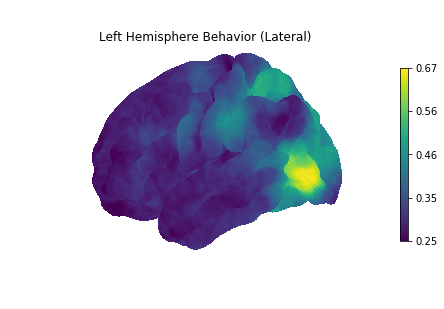

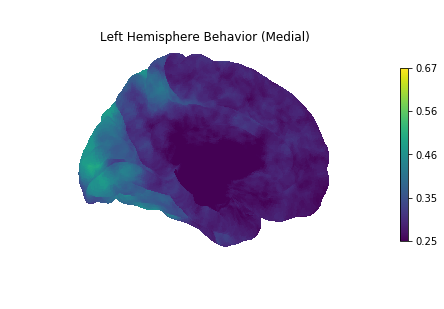

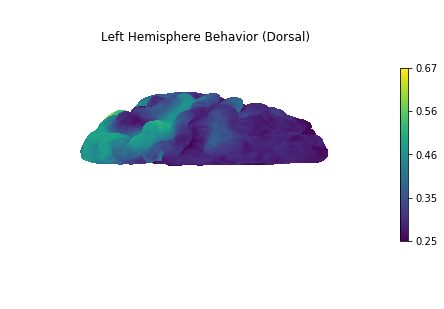

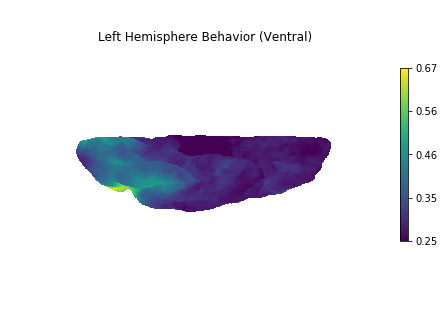

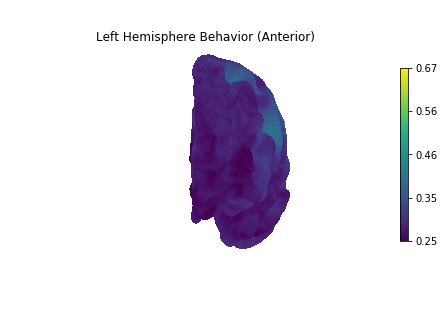

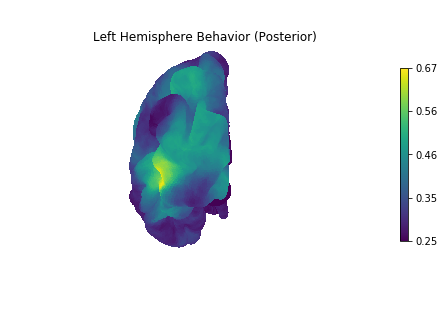

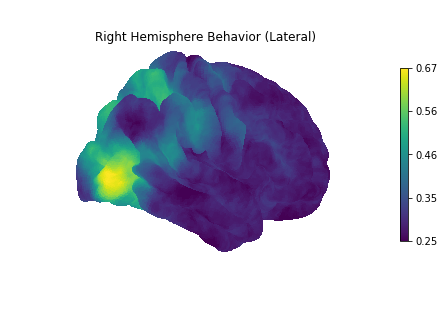

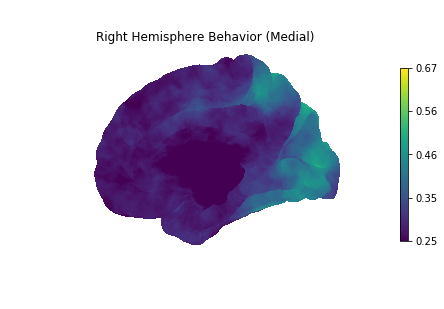

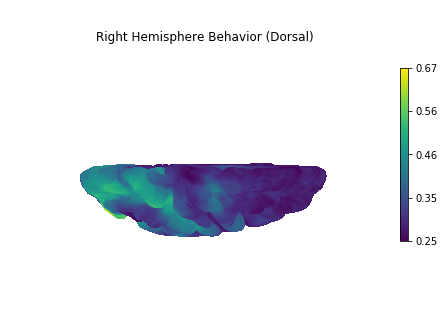

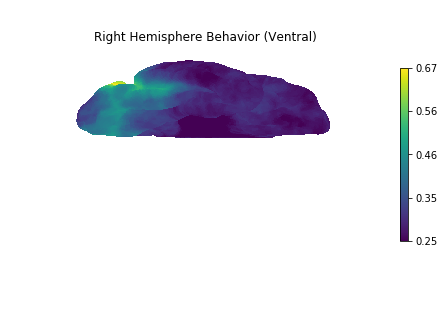

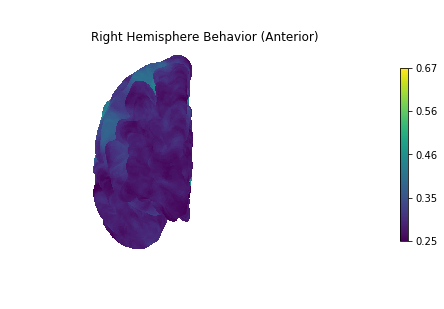

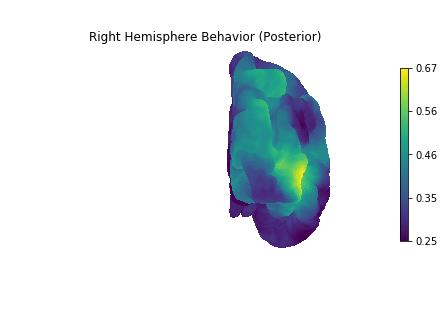

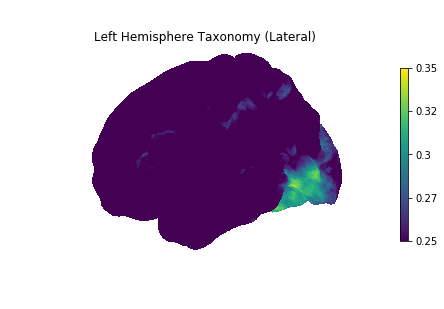

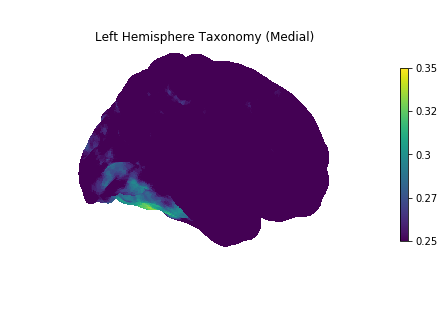

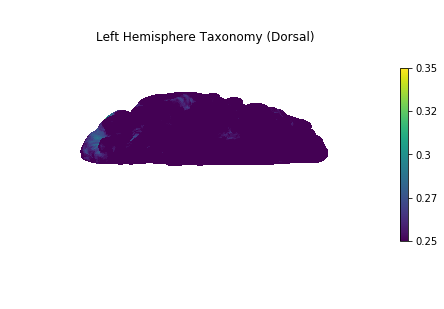

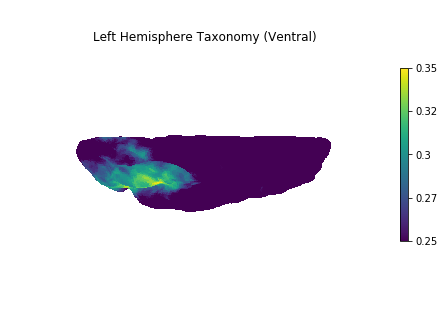

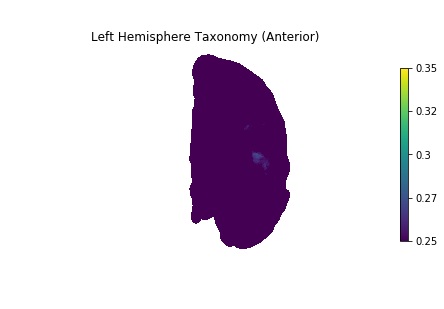

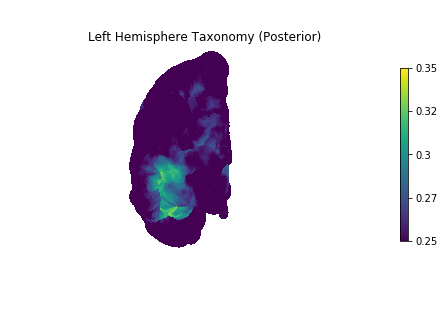

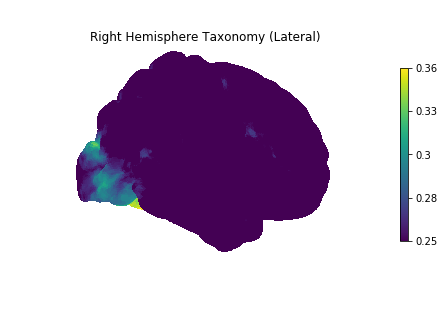

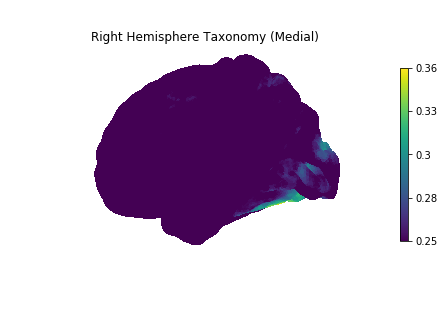

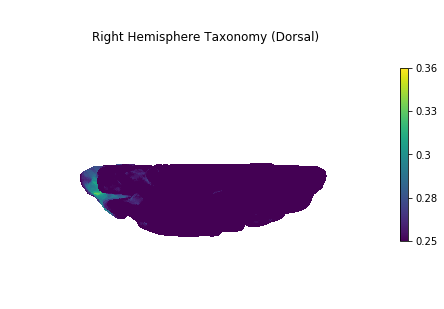

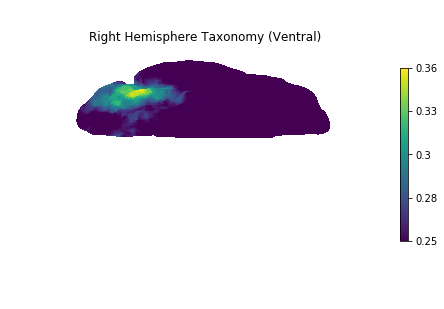

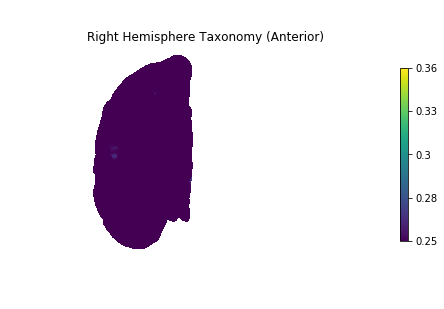

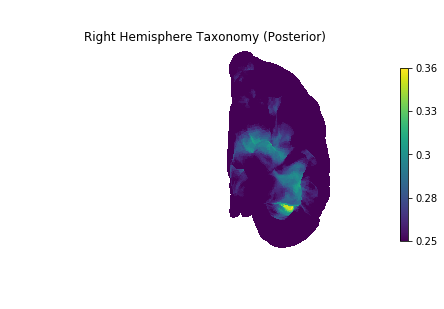

In [21]:
for attend in ['behavior', 'taxonomy']:
    
    for hemisphere in ['left','right']:
        hemi = hemisphere[0]+'h' #to account for "lh" and "left" for different name needs

        file_list = glob.glob("../results/erica_overnight_run/*%s_%s.npy" % (attend, hemi))
        accuracies = np.array(np.load(file_list[0])) # Get first file to get shape

        for file_n in file_list[1:]: 
            accuracies = np.vstack((accuracies, np.load(file_n))) # Add the rest of files
            
        # Plot each ategory
        for view in ['lateral', 'medial', 'dorsal', 'ventral', 'anterior', 'posterior']:
        
            plotting.plot_surf('../glm/%s.pial.gii' % hemi,
                           np.mean(accuracies, axis=0),
                           colorbar = True,
                           vmin=.25,
                           title = '%s Hemisphere %s (%s)' % (hemisphere.capitalize(), attend.capitalize(), view.capitalize()),
                           hemi = hemisphere, 
                           view = view)
            plt.savefig('../figs/%s_%s_%s' % (attend, hemi, view))
    

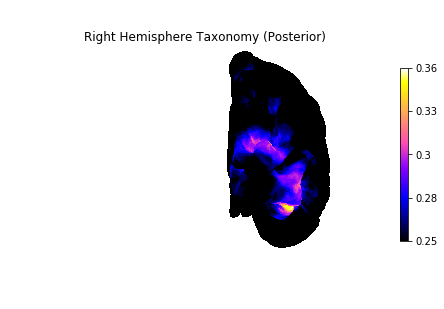

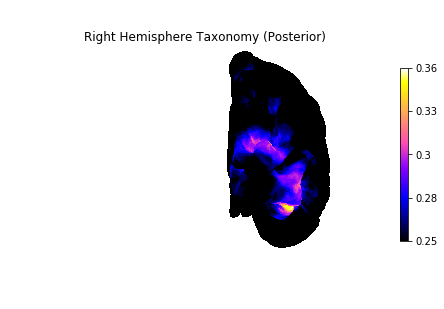

In [23]:
plotting.plot_surf('../glm/%s.pial.gii' % hemi,
                    np.mean(accuracies, axis=0),
                    colorbar = True,
                    vmin=.25,
                    title = '%s Hemisphere %s (%s)' % (hemisphere.capitalize(), attend.capitalize(), view.capitalize()),
                    hemi = hemisphere, 
                    view = view,
                    cmap = 'gnuplot2')